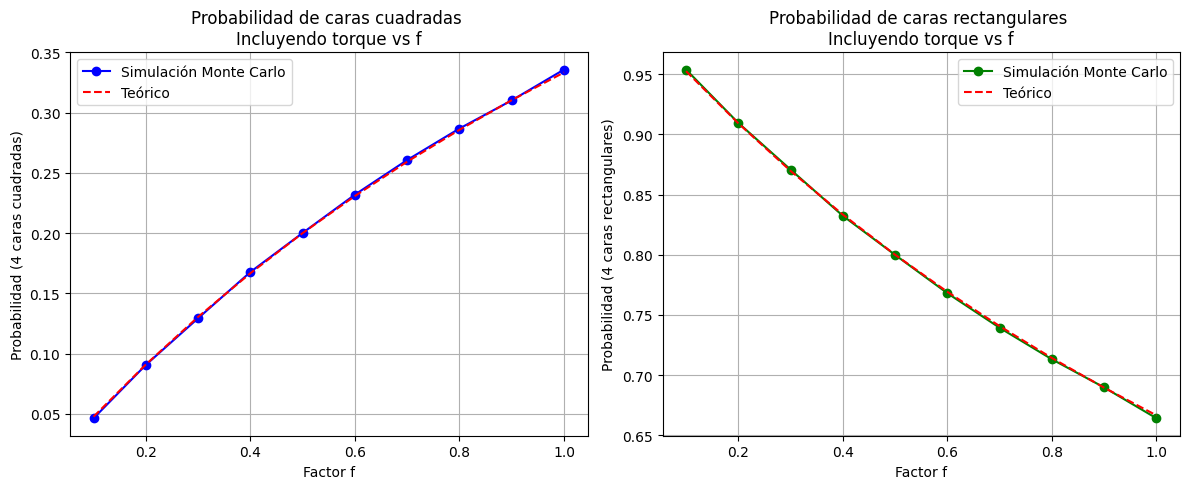

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================
# PARÁMETROS DE LA SIMULACIÓN
# =============================================
N = 100000  # Número de lanzamientos por simulación
f_values = np.linspace(0.1, 1.0, 10)  # Valores del factor f (de 0.1 a 1.0)

# =============================================
# FUNCIÓN PARA CALCULAR ÁNGULOS SÓLIDOS
# =============================================
def angulo_solido(f, L=1.0):
    """Calcula los ángulos sólidos para las caras cuadradas y rectangulares."""
    # Caras cuadradas (2 caras)
    A_cuad = L**2
    d_cuad = L / 2
    omega_cuad = A_cuad / (d_cuad**2)  # = 4

    # Caras rectangulares (4 caras)
    A_rect = f * L**2
    d_rect = f * L / 2
    omega_rect = A_rect / (d_rect**2)  # = 4/f

    return omega_cuad, omega_rect

# =============================================
# SIMULACIÓN MONTE CARLO
# =============================================
# Listas para almacenar resultados
prob_cuad_sim = []  # Probabilidad simulada caras cuadradas
prob_rect_sim = []   # Probabilidad simulada caras rectangulares
prob_cuad_teo = []   # Probabilidad teórica caras cuadradas
prob_rect_teo = []   # Probabilidad teórica caras rectangulares

for f in f_values:
    # 1. Calcular ángulos sólidos
    omega_cuad, omega_rect = angulo_solido(f)

    # 2. Probabilidades TEÓRICAS
    P_total = 2 * omega_cuad + 4 * omega_rect
    P_cuad_teo = (2 * omega_cuad) / P_total  # Probabilidad total caras cuadradas
    P_rect_teo = (4 * omega_rect) / P_total  # Probabilidad total caras rectangulares

    prob_cuad_teo.append(P_cuad_teo)
    prob_rect_teo.append(P_rect_teo)

    # 3. SIMULACIÓN MONTE CARLO
    # Generar N lanzamientos aleatorios según las probabilidades teóricas
    # Usamos la probabilidad de cada TIPO de cara (2 cuadradas vs 4 rectangulares)
    resultados = np.random.choice(
        ['cuadrada', 'rectangular'],
        size=N,
        p=[P_cuad_teo, P_rect_teo]
    )

    # Contar resultados
    count_cuad = np.sum(resultados == 'cuadrada')
    count_rect = N - count_cuad

    # Calcular probabilidades simuladas
    prob_cuad_sim.append(count_cuad / N)
    prob_rect_sim.append(count_rect / N)

# =============================================
# GRÁFICAS
# =============================================
plt.figure(figsize=(12, 5))

# Gráfica 1: Probabilidad caras cuadradas
plt.subplot(1, 2, 1)
plt.plot(f_values, prob_cuad_sim, 'bo-', label='Simulación Monte Carlo')
plt.plot(f_values, prob_cuad_teo, 'r--', label='Teórico')
plt.xlabel('Factor f')
plt.ylabel('Probabilidad (4 caras cuadradas)')
plt.title('Probabilidad de caras cuadradas \nIncluyendo torque vs f')
plt.legend()
plt.grid(True)

# Gráfica 2: Probabilidad caras rectangulares
plt.subplot(1, 2, 2)
plt.plot(f_values, prob_rect_sim, 'go-', label='Simulación Monte Carlo')
plt.plot(f_values, prob_rect_teo, 'r--', label='Teórico')
plt.xlabel('Factor f')
plt.ylabel('Probabilidad (4 caras rectangulares)')
plt.title('Probabilidad de caras rectangulares \nIncluyendo torque vs f')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()